In [317]:
import numpy as np 
import os 
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12 
import warnings 
warnings.filterwarnings('ignore')
np.random.seed(42)
plt.rcParams['font.family'] = 'Times New Roman'

# *KMeans*

In [318]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]]
)

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [319]:
X, y = make_blobs(
    n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7
)

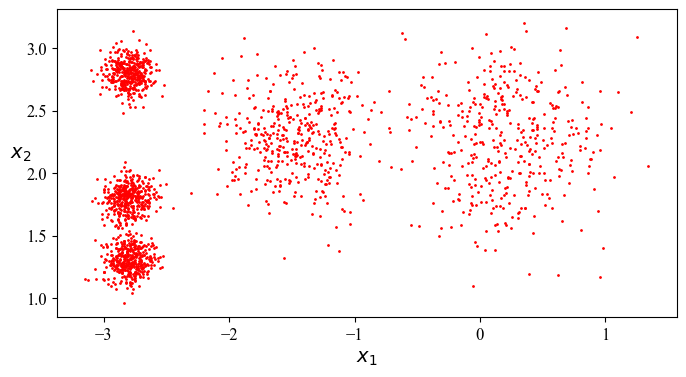

In [320]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c='r', s=1)
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

# 决策边界

In [321]:
from sklearn.cluster import KMeans 

k = 5 
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [322]:
y_pred

array([2, 2, 4, ..., 1, 4, 2])

In [323]:
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2])

In [324]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [325]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1])

In [326]:
kmeans.transform(X_new)

array([[0.12347236, 2.9042344 , 2.83778629, 1.50178217, 0.62652832],
       [3.06863967, 5.84739223, 5.81943941, 4.48368889, 2.56319474],
       [3.06697984, 0.29040966, 1.4618254 , 1.685008  , 3.51958769],
       [2.95975563, 0.36159148, 0.96879317, 1.54053323, 3.47149865]])

In [327]:
# 绘制数据点的函数
def plot_data(X):
    plt.scatter(X[:, 0], X[:, 1], color='k', s=2)  # 使用 plt.scatter 而不是 plt.plot


# 绘制质心的函数
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        selected_centroids = centroids[weights > weights.max() / 10]
    else:
        selected_centroids = centroids

    plt.scatter(
        selected_centroids[:, 0],
        selected_centroids[:, 1],
        marker='o',
        s=30,
        linewidths=8,
        color=circle_color,
        zorder=10,
        alpha=0.9,
    )
    plt.scatter(
        selected_centroids[:, 0],
        selected_centroids[:, 1],
        marker='x',
        s=50,
        linewidths=2,  # 改为更合理的值
        color=cross_color,
        zorder=11,
        alpha=1,
    )


# 绘制决策边界的函数
def plot_decision_boundaries(
    clusterer,
    X,
    resolution=1000,
    show_centroids=True,
    show_xlabels=True,
    show_ylabels=True,
):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution),
    )
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap='Pastel2')
    plt.contour(
        Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k'
    )

    plot_data(X)

    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel('$x_1$', fontsize=14)
    else:
        plt.tick_params(labelbottom='off')

    if show_ylabels:
        plt.ylabel('$x_2$', fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')


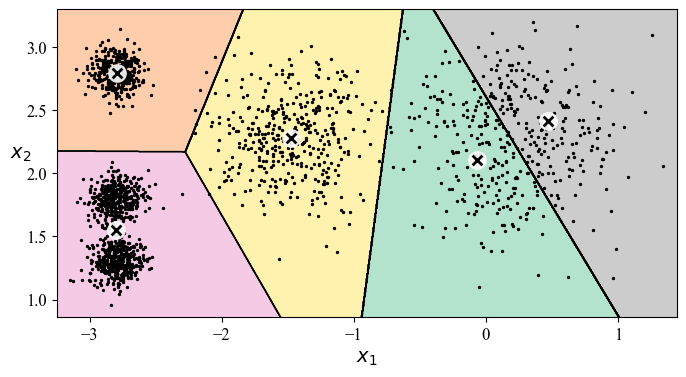

In [328]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

# 算法流程


In [329]:
kmeans_iter1 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

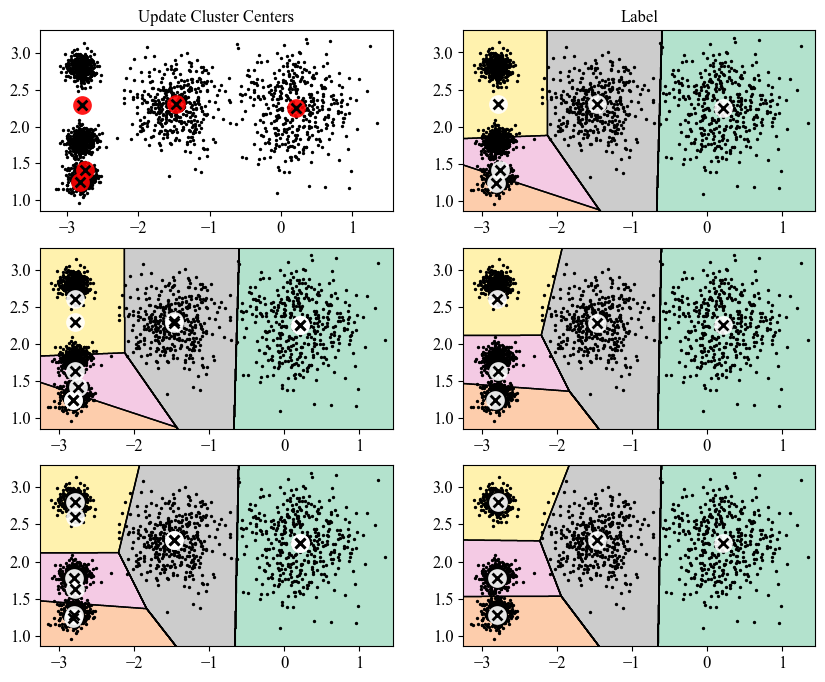

In [330]:
plt.figure(figsize=(10, 8))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='k')
plt.title('Update Cluster Centers')

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title('Label')

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_xlabels=False, show_ylabels=False)

plt.show()

# 不稳定的结果

In [331]:
def plot_clusterer_comparison(c1, c2, X):
    c1.fit(X)
    c2.fit(X)

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plot_decision_boundaries(c1, X)
    
    plt.subplot(122)
    plot_decision_boundaries(c2, X)

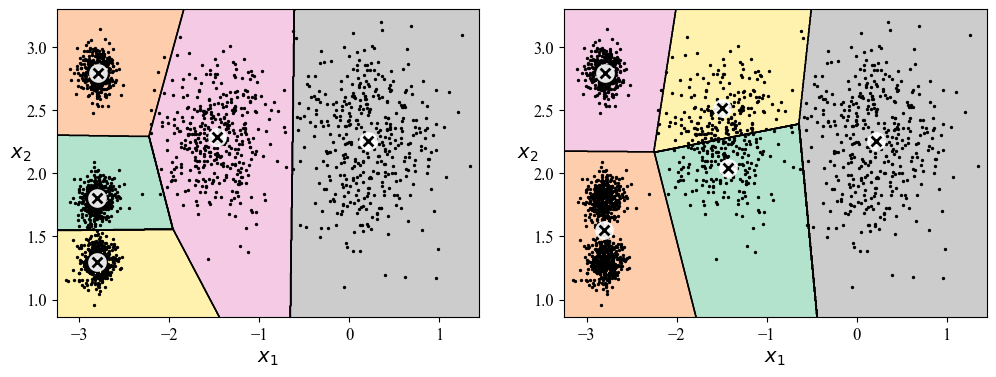

In [332]:
c1 = KMeans(n_clusters=5, init='random', n_init=1, random_state=11)
c2 = KMeans(n_clusters=5, init='random', n_init=1, random_state=5)
plot_clusterer_comparison(c1, c2, X)

# 评估方法
- *Inertia* 指标：每个样本与其质心的距离

In [333]:
kmeans.inertia_

224.07433122515724

In [334]:
X_dist = kmeans.transform(X)
X_dist

array([[2.73844431, 1.45402521, 0.23085922, 1.54204522, 3.34391922],
       [2.82306816, 0.99002955, 0.26810747, 1.47805666, 3.39912897],
       [1.38822261, 4.09069201, 3.78216716, 2.67794429, 1.33653447],
       ...,
       [2.80678045, 0.06769209, 1.17785478, 1.40106167, 3.28864968],
       [0.42764894, 3.05913478, 3.15905017, 1.71924814, 0.23020951],
       [2.5754254 , 0.85434589, 0.43658314, 1.20868514, 3.1420062 ]])

In [335]:
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2])

In [336]:
X_dist[np.arange(len(X_dist)), kmeans.labels_]

array([0.23085922, 0.26810747, 1.33653447, ..., 0.06769209, 0.23020951,
       0.43658314])

In [337]:
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)  # 结果一致

224.0743312251575

In [338]:
kmeans.score(X)

-224.0743312251573

In [339]:
c1.inertia_

211.5985372581684

In [340]:
c2.inertia_

239.19226403410454

# 找到最佳簇数

In [341]:
kmeans_per_k = [KMeans(n_clusters=k).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

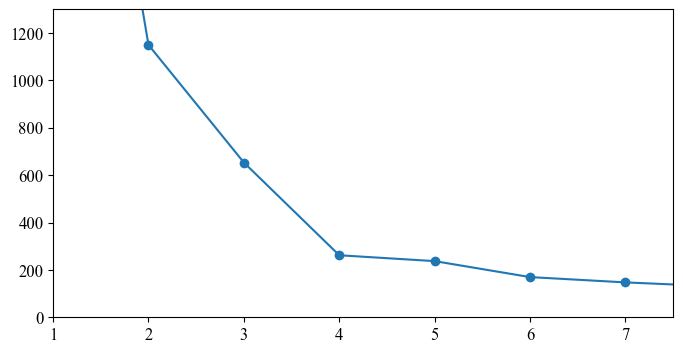

In [342]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, 'o-')
plt.axis([1, 7.5, 0, 1300])
plt.show()

In [343]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6267891051050735

In [344]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
silhouette_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.618858196925946,
 0.6027611425418072,
 0.5655393882558312,
 0.5911144503137686,
 0.5661946395774896]

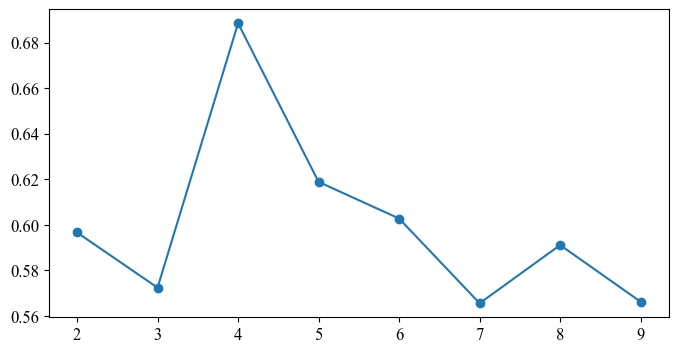

In [345]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, 'o-')
plt.show()

# KMeans 存在的问题

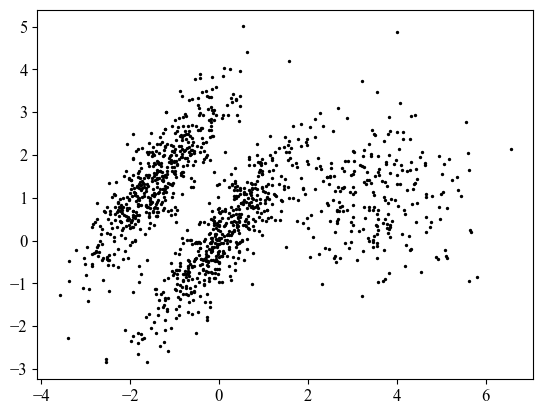

In [346]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 +[6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_data(X)

In [347]:
kmeans_good = KMeans(
    n_clusters=3,
    init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
    n_init=1,
    random_state=42,
)
kmeans_bad = KMeans(n_clusters=3, random_state=42, n_init=1)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, n_init=1, random_state=42)

Text(0.5, 1.0, 'Bad Inertia = 2242.4186929658495')

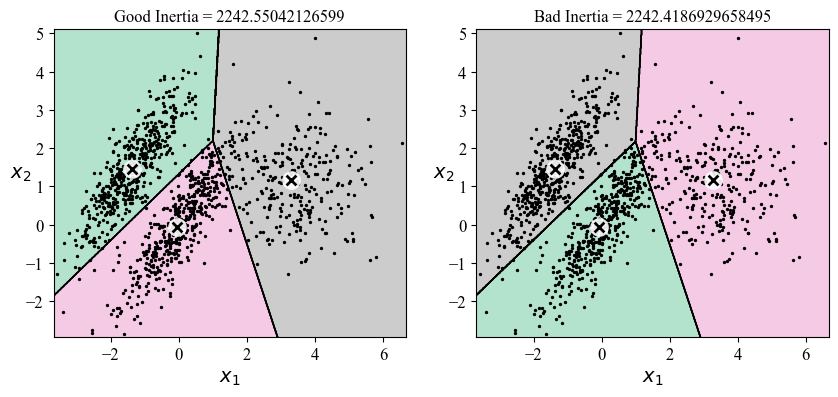

In [348]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f'Good Inertia = {kmeans_good.inertia_}')

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X)
plt.title(f'Bad Inertia = {kmeans_bad.inertia_}')

# 图像分割

In [349]:
from matplotlib.image import imread 

image = imread('./data/flower.jpg')
image.shape

(996, 685, 3)

In [350]:
X = image.reshape(-1, 3)
X.shape

(682260, 3)

In [351]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
kmeans.cluster_centers_


array([[105.05111288, 149.69895962,  47.35254296],
       [248.20407406, 234.85331224,   5.37058828],
       [135.32970522, 176.74093708, 135.92853741],
       [ 20.57146629,  28.91462771,  13.55502552],
       [214.86425852, 170.95568278,  21.96233762],
       [180.16749559, 208.82501789, 206.59045774],
       [ 86.51620323, 136.58987096, 103.9708763 ],
       [ 60.61873829,  98.0912867 ,  47.11962315]])

In [352]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape((996, 685, 3))

In [353]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


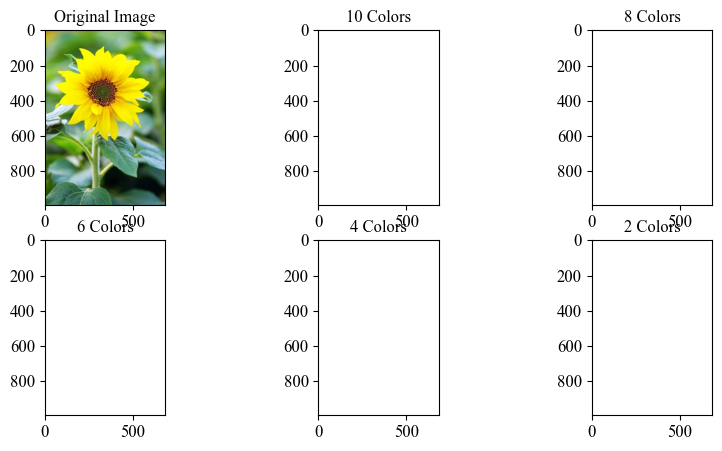

In [354]:
plt.figure(figsize=(10, 5))
plt.subplot(231)
plt.imshow(image)
plt.title('Original Image')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title(f'{n_clusters} Colors')


(996, 685, 3)
(682260, 3)
[[105.05111288 149.69895962  47.35254296]
 [248.20407406 234.85331224   5.37058828]
 [135.32970522 176.74093708 135.92853741]
 [ 20.57146629  28.91462771  13.55502552]
 [214.86425852 170.95568278  21.96233762]
 [180.16749559 208.82501789 206.59045774]
 [ 86.51620323 136.58987096 103.9708763 ]
 [ 60.61873829  98.0912867   47.11962315]]


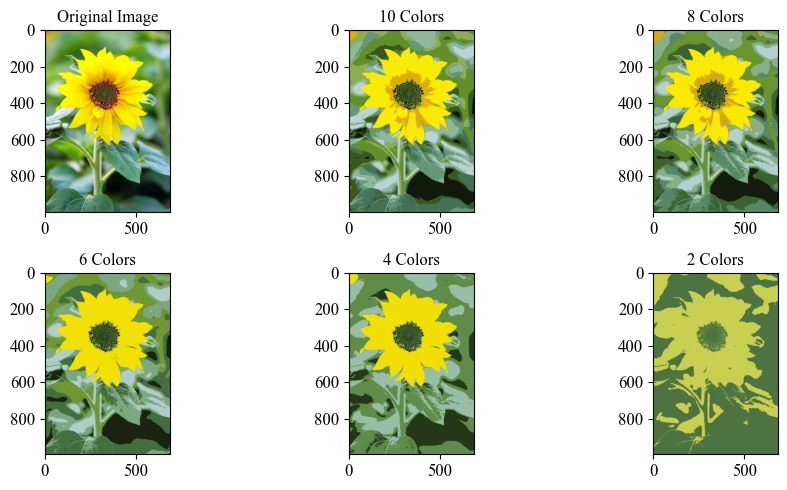

In [355]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# 读取并查看图像
image = imread('./data/flower.jpg')
print(image.shape)  # 打印图像形状

# 展平图像数据
X = image.reshape(-1, 3)
print(X.shape)

# 创建一个 KMeans 模型并进行聚类
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
print(kmeans.cluster_centers_)

# 生成分割图像
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    # 确保数据范围在 [0, 255] 或 [0, 1]
    segmented_img = np.clip(segmented_img, 0, 255)
    segmented_imgs.append(segmented_img.reshape(image.shape))

# 绘制原始图像和分割图像
plt.figure(figsize=(10, 5))
plt.subplot(231)
plt.imshow(image)
plt.title('Original Image')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx].astype(np.uint8))  # 转换为 uint8 类型
    plt.title(f'{n_clusters} Colors')

plt.tight_layout()
plt.show()


# 半监督学习

In [356]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [357]:
X_train.shape

(1347, 64)

In [358]:
from sklearn.linear_model import LogisticRegression 

n_labeled = 50 

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8266666666666667

In [359]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
X_digits_dist

array([[51.1856575 , 50.78717632, 40.28756989, ..., 55.70865772,
        44.59192845, 32.20286066],
       [45.92749906, 34.52800938, 49.59614847, ..., 26.54498754,
        40.89103137, 53.44980241],
       [41.94442955, 45.17179567, 40.30853437, ..., 47.61397809,
        42.90246964, 42.37615509],
       ...,
       [46.25360284, 18.79931385, 52.17066171, ..., 37.63581466,
        36.82000557, 50.44894115],
       [44.8398026 , 35.66336691, 47.12952086, ..., 44.50842617,
        39.19397091, 31.7550213 ],
       [50.05392868, 42.89735927, 44.55355566, ..., 49.44694126,
        33.74885979, 42.13018877]])

In [360]:
X_representative_digits_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits_idx.shape

(50,)

In [361]:
X_representative_digits = X_train[X_representative_digits_idx]

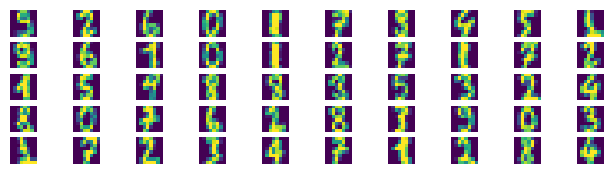

In [362]:
plt.figure(figsize=(8, 2))

for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8))
    plt.axis('off')

plt.show()

In [363]:
y_representative_digits = np.array([
    9, 8, 6, 0, 1, 7, 8, 9, 5, 1, 9, 6, 1, 0, 1, 2, 7, 1, 7, 8, 4, 5, 9, 8, 8,
    3, 5, 3, 2, 4, 8, 0, 7, 6, 2, 8, 3, 9, 0, 3, 1, 7, 2, 3, 4, 7, 1, 2, 8, 4
])

In [364]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8666666666666667

In [365]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(random_state=42)

In [366]:
log_reg.score(X_test, y_test)

0.8711111111111111

In [367]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(random_state=42)

In [368]:
log_reg.score(X_test, y_test)

0.8711111111111111

In [369]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [370]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [371]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(random_state=42)

In [372]:
log_reg.score(X_test, y_test)

0.8711111111111111

# *DBSCAN*

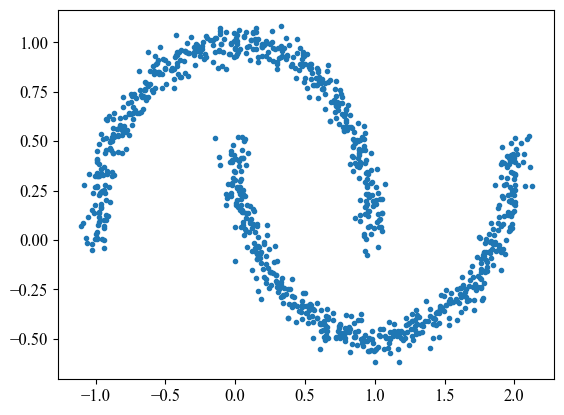

In [373]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
plt.plot(X[:, 0], X[:, 1], '.')

In [374]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [375]:
dbscan.labels_

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  3,  2,  3

In [376]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [377]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [378]:
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [379]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0],
                cores[:, 1],
                c=dbscan.labels_[core_mask],
                marker='o',
                s=size,
                cmap="Paired")
    plt.scatter(cores[:, 0],
                cores[:, 1],
                marker='*',
                s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker="x", s=100)
    plt.scatter(non_cores[:, 0],
                non_cores[:, 1],
                c=dbscan.labels_[non_core_mask],
                marker='.')
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')

    if show_ylabels:
        plt.ylabel('$x_2$', fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title('eps={:.2f}, min_samples={}'.format(dbscan.eps, dbscan.min_samples), fontsize=14)


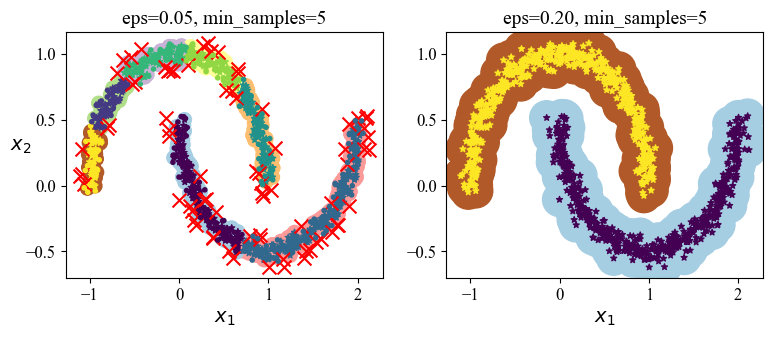

In [380]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [ ]:
import pan